# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

## Download from Atlas and Load Data

In [3]:
ens_codes = [
    "3a1g_B"
]
data_dir = 'C:/Users/nikol/Documents/test_dir/atlas'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='atlas')

Download complete. Saved to: C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.zip
Downloaded file 3a1g_B.zip from Atlas.
Extracted directory C:\Users\nikol\Documents\test_dir\atlas.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R1_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R2_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R3_fit.top.pdb.
Analysing ensembles: ['3a1g_B_prod_R1_fit', '3a1g_B_prod_R2_fit', '3a1g_B_prod_R3_fit']


In [4]:
analysis.generate_trajectories()

Trajectory already exists for ensemble 3a1g_B_prod_R1_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R2_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R3_fit. Loading trajectory.


In [5]:
analysis.random_sample_trajectories(sample_size=200)

## Featurization

In [6]:
analysis.perform_feature_extraction(featurization='phi_psi')

Performing feature extraction for Ensemble: 3a1g_B_prod_R1_fit.
Transformed ensemble shape: (200, 78)
Performing feature extraction for Ensemble: 3a1g_B_prod_R2_fit.
Transformed ensemble shape: (200, 78)
Performing feature extraction for Ensemble: 3a1g_B_prod_R3_fit.
Transformed ensemble shape: (200, 78)
Feature names: ['GLY2-PHI', 'SER3-PHI', 'MET4-PHI', 'GLU5-PHI', 'ARG6-PHI', 'ILE7-PHI', 'LYS8-PHI', 'GLU9-PHI', 'LEU10-PHI', 'ARG11-PHI', 'ASN12-PHI', 'LEU13-PHI', 'MET14-PHI', 'SER15-PHI', 'GLN16-PHI', 'SER17-PHI', 'ARG18-PHI', 'THR19-PHI', 'ARG20-PHI', 'GLU21-PHI', 'ILE22-PHI', 'LEU23-PHI', 'THR24-PHI', 'LYS25-PHI', 'THR26-PHI', 'THR27-PHI', 'VAL28-PHI', 'ASP29-PHI', 'HIS30-PHI', 'MET31-PHI', 'ALA32-PHI', 'ILE33-PHI', 'ILE34-PHI', 'LYS35-PHI', 'LYS36-PHI', 'TYR37-PHI', 'THR38-PHI', 'SER39-PHI', 'GLY40-PHI', 'GLY1-PSI', 'GLY2-PSI', 'SER3-PSI', 'MET4-PSI', 'GLU5-PSI', 'ARG6-PSI', 'ILE7-PSI', 'LYS8-PSI', 'GLU9-PSI', 'LEU10-PSI', 'ARG11-PSI', 'ASN12-PSI', 'LEU13-PSI', 'MET14-PSI', 'SER15

In [7]:
rg = analysis.rg_calculator()
len(rg)

600

## Dimensionality Reduction

In [8]:
analysis.fit_dimensionality_reduction(method='tsne', perplexity_vals = [10, 50, 90], circular=True, range_n_clusters=range(2,10,1))

tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 50
Best Number of Clusters: 3


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

## Analysis

[  3   7  10  13  14  17  38  46  49  58  63  66  67  74  77  86  90  96
 104 105 107 111 117 119 124 125 126 127 128 142 147 151 153 156 159 162
 163 168 174 179 182 184 196 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372
 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390
 391 392 393 394 395 396 397 398 399 410 417 422 42

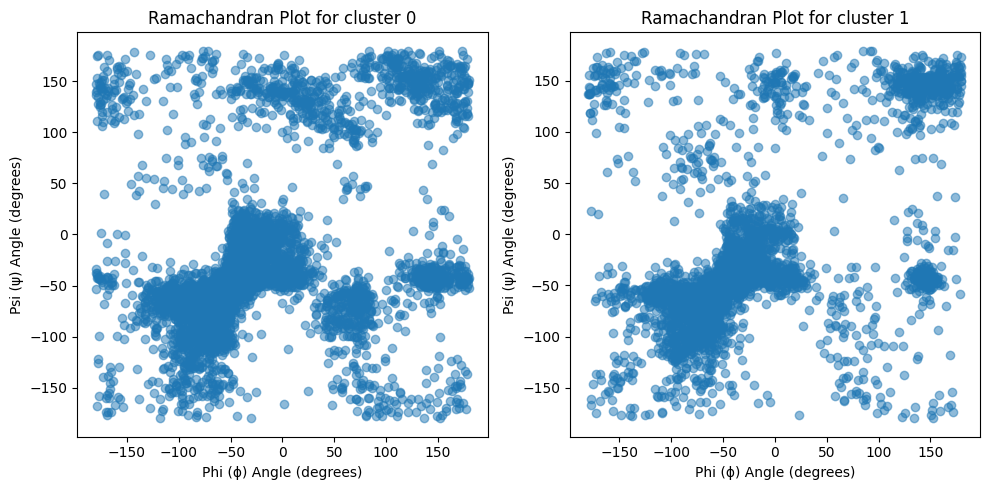

In [9]:
analysis.tsne_ramachandran_plot()

[  3   7  10  13  14  17  38  46  49  58  63  66  67  74  77  86  90  96
 104 105 107 111 117 119 124 125 126 127 128 142 147 151 153 156 159 162
 163 168 174 179 182 184 196 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372
 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390
 391 392 393 394 395 396 397 398 399 410 417 422 42

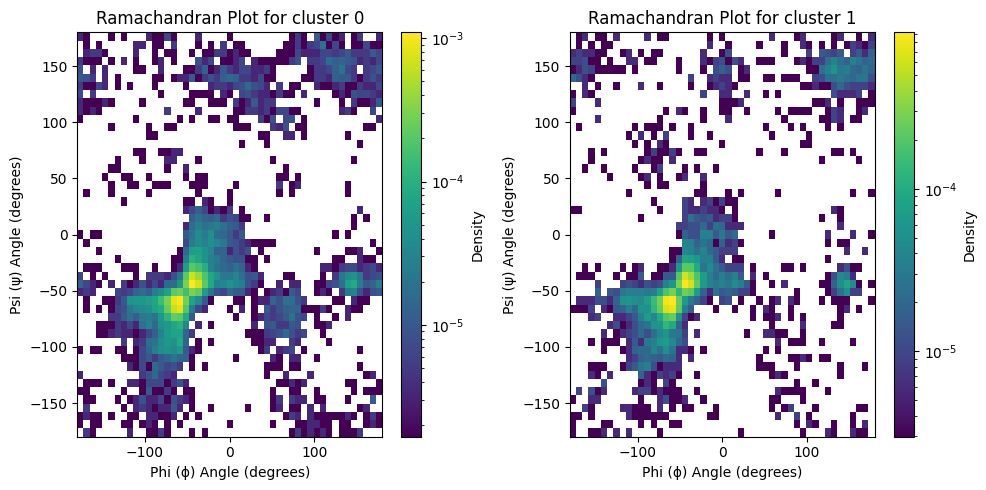

In [10]:
analysis.tsne_ramachandran_plot_density()

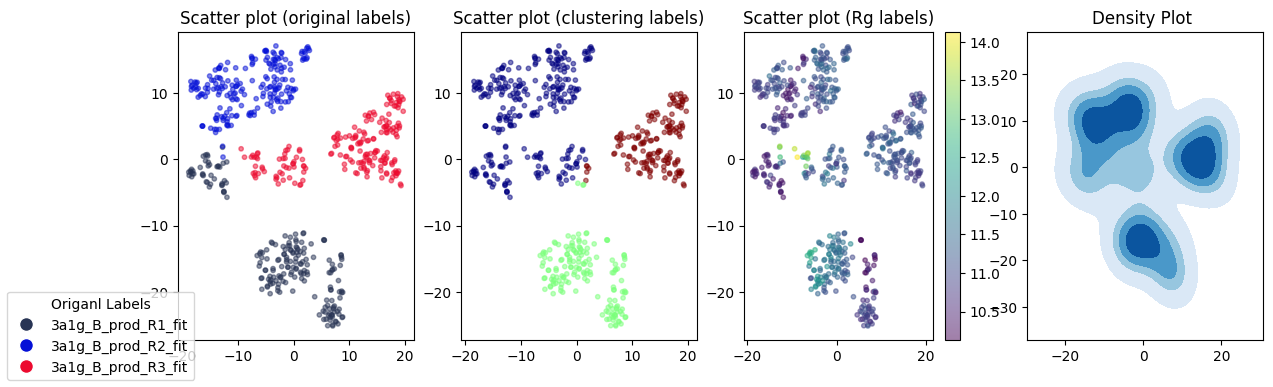

In [11]:
analysis.tsne_scatter_plot()

In [12]:
analysis.tsne_scatter_plot_2()